In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Load flowers dataset

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 66s 0us/step


In [20]:
import pathlib

data_dir = pathlib.Path("datasets/flower_photos/flower_photos")

print("Exists:", data_dir.exists())
print("Folders:", list(data_dir.iterdir()))

image_paths = list(data_dir.glob("*/*.*"))
print("Total images:", len(image_paths))
print(image_paths[:5])


Exists: True
Folders: [WindowsPath('datasets/flower_photos/flower_photos/daisy'), WindowsPath('datasets/flower_photos/flower_photos/dandelion'), WindowsPath('datasets/flower_photos/flower_photos/LICENSE.txt'), WindowsPath('datasets/flower_photos/flower_photos/roses'), WindowsPath('datasets/flower_photos/flower_photos/sunflowers'), WindowsPath('datasets/flower_photos/flower_photos/tulips')]
Total images: 3670
[WindowsPath('datasets/flower_photos/flower_photos/daisy/100080576_f52e8ee070_n.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10140303196_b88d3d6cec.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10172379554_b296050f82_n.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10172567486_2748826a8b.jpg'), WindowsPath('datasets/flower_photos/flower_photos/daisy/10172636503_21bededa75_n.jpg')]


In [21]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

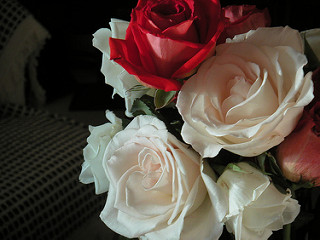

In [23]:
PIL.Image.open(str(roses[1]))

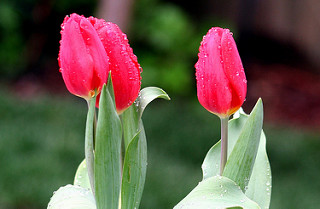

In [24]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

Read flowers images from disk into numpy array using opencv

In [25]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [26]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [27]:
str(flowers_images_dict['roses'][0])

'datasets\\flower_photos\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [28]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [29]:
img.shape

(240, 179, 3)

In [30]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [33]:
X,y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [37]:
X = np.array(X)
y = np.array(y)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [39]:
X_train_scaled = X_train / 255.0
X_test_scaled = X_test / 255.0

In [41]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10) 

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 239ms/step - accuracy: 0.4782 - loss: 1.2573
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 235ms/step - accuracy: 0.6319 - loss: 0.9550
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 241ms/step - accuracy: 0.7144 - loss: 0.7630
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 236ms/step - accuracy: 0.7751 - loss: 0.5959
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 233ms/step - accuracy: 0.8732 - loss: 0.3765
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 233ms/step - accuracy: 0.9230 - loss: 0.2293
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 236ms/step - accuracy: 0.9615 - loss: 0.1230
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 233ms/step - accuracy: 0.9804 - loss: 0.0832
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 21s 244ms/step - accuracy: 0.9891 - loss: 0.0457
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 20s 235ms/step - accuracy: 0.9949 - loss: 0.0235


In [42]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.6329 - loss: 2.0469


[2.0469412803649902, 0.6328976154327393]

Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (66.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting

In [43]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step


array([[  0.5338558 ,  22.179707  ,  -2.9912663 ,  -6.7010446 ,
         -6.855818  ],
       [ 13.42382   ,   3.2968802 , -13.579445  ,  -3.6669188 ,
          6.8523116 ],
       [ -1.0994773 ,   3.292418  ,  12.398386  ,  -5.0247545 ,
         -5.3412642 ],
       ...,
       [  1.0049292 ,   0.972307  , -13.357498  ,   8.858431  ,
          9.183825  ],
       [ -0.92823726,   3.5425549 ,   3.3245392 ,   6.69274   ,
         -3.3030705 ],
       [  3.336658  ,  -6.896886  ,  -1.0863847 ,   3.8362198 ,
          4.8784842 ]], shape=(918, 5), dtype=float32)

In [44]:
score = tf.nn.softmax(predictions[0])

In [45]:
np.argmax(score)

np.int64(1)

In [46]:
y_test[0]

np.int64(1)

Improve Test Accuracy Using Data Augmentation

In [51]:
img_height = 180
img_width = 180

In [52]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])


original image

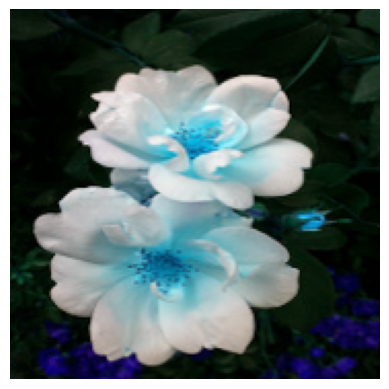

In [53]:
plt.axis('off')
plt.imshow(X[0])

Newly generated training sample using data augmentation

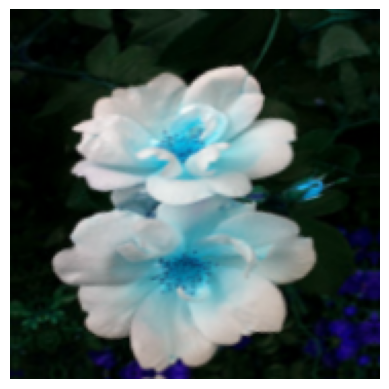

In [55]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

Train the model using data augmentation and a drop out layer

In [56]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 37s 359ms/step - accuracy: 0.4244 - loss: 1.3040
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 341ms/step - accuracy: 0.5938 - loss: 1.0404
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 314ms/step - accuracy: 0.6374 - loss: 0.9136
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 27s 316ms/step - accuracy: 0.6679 - loss: 0.8481
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 28s 321ms/step - accuracy: 0.7006 - loss: 0.7763
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 301ms/step - accuracy: 0.6948 - loss: 0.7881
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 299ms/step - accuracy: 0.7322 - loss: 0.7193
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 295ms/step - accuracy: 0.7395 - loss: 0.6896
Epoch 9/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 298ms/step - accuracy: 0.7478 - loss: 0.6541
Epoch 10/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 33s 379ms/step - accuracy: 0.7584 - loss: 0.6451


In [57]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.7048 - loss: 0.8595


[0.8594646453857422, 0.7047930359840393]